In [20]:
import geopandas as gpd 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
df = pd.read_csv('data/merge_1.csv', index_col=0)
df.head()

,Name_x,Patents,Exits,Jobs,Funding,Reporting Year,Name_y,First,Last,Join_Date,Race,Gender,Sexuality,Transgender,Self-Identified
0,Hernandez Ltd,2,8000000,61,8000000,2002,Bill Sanford,Bill,Sanford,2004-08-18,White,M,H,N,NaN
1,Valentine-Acosta,0,1500000,34,1500000,2014,Sarah Palmer,Sarah,Palmer,2017-06-06,White,M,H,N,NaN
2,Ochoa-Miranda,2,13000000,58,13000000,2003,Jim Mcdaniel,Jim,Mcdaniel,2009-11-28,Hispanic,F,H,N,NaN
3,Christian-Peters,4,2000000,18,25500000,2001,Ashley Moreno,Ashley,Moreno,2006-08-01,Hispanic,F,H,N,NaN
4,Thompson Group,2,5500000,39,2000000,2010,Kevin Knox,Kevin,Knox,2021-06-12,Hispanic,F,H,N,NaN


In [22]:
df_2 = pd.read_csv('data/df_info.csv', index_col=0)
df_2.head()

,Name,Founding Date,Industry,Location
0,Hernandez Ltd,2002-07-28,Biotech,"Missoula, MT"
1,Valentine-Acosta,2014-09-05,Food Prod.,"Grand Rapids, MI"
2,Ochoa-Miranda,2003-11-29,Tech Hardware & Storage,"Miami, FL"
3,Christian-Peters,2001-07-21,Software,"Charlotte, NC"
4,Thompson Group,2010-12-26,eCommerce,"St. Louis, MO"


In [23]:
merge_2 = df.merge(df_2, left_on='Name_x', right_on='Name', how='left')
merge_2.head()

,Name_x,Patents,Exits,Jobs,Funding,Reporting Year,Name_y,First,Last,Join_Date,Race,Gender,Sexuality,Transgender,Self-Identified,Name,Founding Date,Industry,Location
0,Hernandez Ltd,2,8000000,61,8000000,2002,Bill Sanford,Bill,Sanford,2004-08-18,White,M,H,N,NaN,Hernandez Ltd,2002-07-28,Biotech,"Missoula, MT"
1,Valentine-Acosta,0,1500000,34,1500000,2014,Sarah Palmer,Sarah,Palmer,2017-06-06,White,M,H,N,NaN,Valentine-Acosta,2014-09-05,Food Prod.,"Grand Rapids, MI"
2,Ochoa-Miranda,2,13000000,58,13000000,2003,Jim Mcdaniel,Jim,Mcdaniel,2009-11-28,Hispanic,F,H,N,NaN,Ochoa-Miranda,2003-11-29,Tech Hardware & Storage,"Miami, FL"
3,Christian-Peters,4,2000000,18,25500000,2001,Ashley Moreno,Ashley,Moreno,2006-08-01,Hispanic,F,H,N,NaN,Christian-Peters,2001-07-21,Software,"Charlotte, NC"
4,Thompson Group,2,5500000,39,2000000,2010,Kevin Knox,Kevin,Knox,2021-06-12,Hispanic,F,H,N,NaN,Thompson Group,2010-12-26,eCommerce,"St. Louis, MO"


In [24]:
merge_2.isna().sum()

Name_x                  0
Patents                 0
Exits                   0
Jobs                    0
Funding                 0
Reporting Year          0
Name_y                  0
First                   0
Last                    0
Join_Date               0
Race                    0
Gender                  0
Sexuality               0
Transgender             0
Self-Identified    638329
Name                    0
Founding Date           0
Industry                0
Location                0
dtype: int64

In [25]:
merge_2 = merge_2.replace({'Self-Identified': {np.nan: 'NA'}})
merge_2.isna().sum()

Name_x             0
Patents            0
Exits              0
Jobs               0
Funding            0
Reporting Year     0
Name_y             0
First              0
Last               0
Join_Date          0
Race               0
Gender             0
Sexuality          0
Transgender        0
Self-Identified    0
Name               0
Founding Date      0
Industry           0
Location           0
dtype: int64

In [7]:
merge_2.to_csv('data/final.csv')

In [8]:
data = merge_2.copy()
data.head()

,Name_x,Patents,Exits,Jobs,Funding,Reporting Year,Name_y,First,Last,Join_Date,Race,Gender,Sexuality,Transgender,Self-Identified,Name,Founding Date,Industry,Location
0,Anderson-Zavala,2,2856173,61,3706173,2017,Bill Sanford,Bill,Sanford,2004-07-06,White,M,H,N,NA,Anderson-Zavala,2017-08-08,Biotech,"Missoula, MT"
1,"Bullock, Gonzalez and Hensley",0,9770578,34,27397794,2002,Sarah Palmer,Sarah,Palmer,2020-01-10,White,M,H,N,NA,"Bullock, Gonzalez and Hensley",2002-12-12,Food Prod.,"Grand Rapids, MI"
2,"Simpson, Hicks and Perkins",2,11762344,58,12612344,2005,Jim Mcdaniel,Jim,Mcdaniel,2001-07-31,Hispanic,F,H,N,NA,"Simpson, Hicks and Perkins",2005-10-12,Tech Hardware & Storage,"Miami, FL"
3,Byrd-Alexander,4,1362538,18,2212538,2011,Ashley Moreno,Ashley,Moreno,2013-10-08,Hispanic,F,H,N,NA,Byrd-Alexander,2011-10-11,Software,"Charlotte, NC"
4,"Nunez, Hall and Martinez",2,10542380,39,11392380,2001,Kevin Knox,Kevin,Knox,2015-04-07,Hispanic,F,H,N,NA,"Nunez, Hall and Martinez",2001-12-16,eCommerce,"St. Louis, MO"


In [9]:
data.columns

Index(['Name_x', 'Patents', 'Exits', 'Jobs', 'Funding', 'Reporting Year',
       'Name_y', 'First', 'Last', 'Join_Date', 'Race', 'Gender', 'Sexuality',
       'Transgender', 'Self-Identified', 'Name', 'Founding Date', 'Industry',
       'Location'],
      dtype='object')

In [10]:
data.columns=['Company', 'Patents', 'Exits', 'Jobs', 'Funding', 'Date',
       'Founder', 'First', 'Last', 'Join Date', 'Race', 'Gender', 'Sexuality',
       'Transgender', 'Self-Identified', 'Name', 'Founding Date', 'Industry',
       'Location']

In [11]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y')
data.head()

,Company,Patents,Exits,Jobs,Funding,Date,Founder,First,Last,Join Date,Race,Gender,Sexuality,Transgender,Self-Identified,Name,Founding Date,Industry,Location
0,Anderson-Zavala,2,2856173,61,3706173,2017-01-01,Bill Sanford,Bill,Sanford,2004-07-06,White,M,H,N,NA,Anderson-Zavala,2017-08-08,Biotech,"Missoula, MT"
1,"Bullock, Gonzalez and Hensley",0,9770578,34,27397794,2002-01-01,Sarah Palmer,Sarah,Palmer,2020-01-10,White,M,H,N,NA,"Bullock, Gonzalez and Hensley",2002-12-12,Food Prod.,"Grand Rapids, MI"
2,"Simpson, Hicks and Perkins",2,11762344,58,12612344,2005-01-01,Jim Mcdaniel,Jim,Mcdaniel,2001-07-31,Hispanic,F,H,N,NA,"Simpson, Hicks and Perkins",2005-10-12,Tech Hardware & Storage,"Miami, FL"
3,Byrd-Alexander,4,1362538,18,2212538,2011-01-01,Ashley Moreno,Ashley,Moreno,2013-10-08,Hispanic,F,H,N,NA,Byrd-Alexander,2011-10-11,Software,"Charlotte, NC"
4,"Nunez, Hall and Martinez",2,10542380,39,11392380,2001-01-01,Kevin Knox,Kevin,Knox,2015-04-07,Hispanic,F,H,N,NA,"Nunez, Hall and Martinez",2001-12-16,eCommerce,"St. Louis, MO"


In [12]:
data.set_index('Date', inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 718782 entries, 2017-01-01 to 2021-01-01
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Company          718782 non-null  object
 1   Patents          718782 non-null  int64 
 2   Exits            718782 non-null  int64 
 3   Jobs             718782 non-null  int64 
 4   Funding          718782 non-null  int64 
 5   Founder          718782 non-null  object
 6   First            718782 non-null  object
 7   Last             718782 non-null  object
 8   Join Date        718782 non-null  object
 9   Race             718782 non-null  object
 10  Gender           718782 non-null  object
 11  Sexuality        718782 non-null  object
 12  Transgender      718782 non-null  object
 13  Self-Identified  718782 non-null  object
 14  Name             718782 non-null  object
 15  Founding Date    718782 non-null  object
 16  Industry         718782 non-null  object

In [14]:
funding = data['Funding']
funding.head()

Date
2017-01-01     3706173
2002-01-01    27397794
2005-01-01    12612344
2011-01-01     2212538
2001-01-01    11392380
Name: Funding, dtype: int64

In [18]:
funding_monthly = funding.resample('12M').asfreq()
funding_monthly.head()

ValueError: cannot reindex from a duplicate axis

<AxesSubplot:xlabel='Date'>

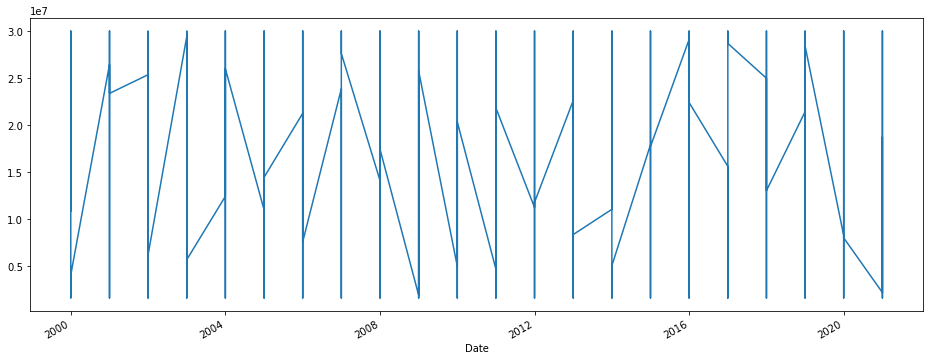

In [17]:
funding.plot(figsize=(16,6))

<AxesSubplot:xlabel='Date'>

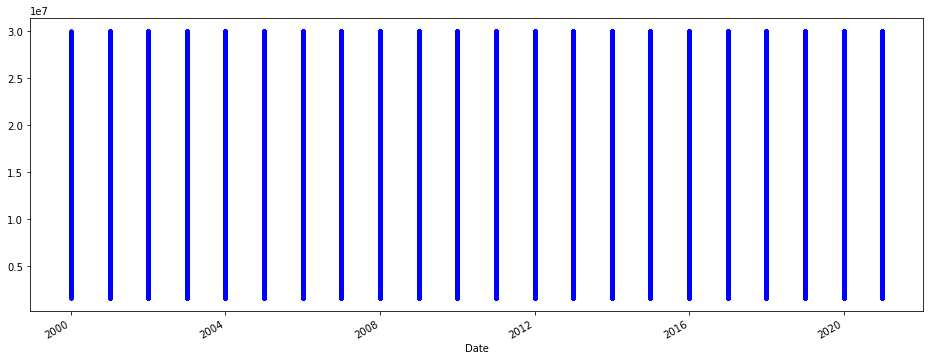

In [19]:
funding.plot(figsize=(16,6), style='.b')